<a href="https://colab.research.google.com/github/windyday0622/windyday/blob/main/m9_VISION%20%EC%9D%91%EC%9A%A9/%20m9_gpt4o_mini_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GPT-4o 및 GPT-4o mini 소개
- GPT-4o("o"는 "omni"를 의미)와 GPT-4o mini는 기본적으로 텍스트, 오디오 및 비디오 입력의 조합을 처리하도록 설계된 멀티모달 모델이며 텍스트, 오디오 및 이미지 형식으로 출력을 생성할 수 있습니다. GPT-4o mini는 GPT-4o의 가벼운 버전입니다.

배경
- GPT-4o 이전에는 사용자가 세 개의 별도 모델로 작동하는 Voice Mode를 사용하여 ChatGPT와 상호 작용할 수 있었습니다. GPT-4o는 이러한 기능을 텍스트, 시각 및 오디오에서 학습된 단일 모델로 통합합니다. 이 통합된 접근 방식은 텍스트, 시각 또는 청각 여부에 관계없이 모든 입력이 동일한 신경망에서 응집적으로 처리되도록 합니다.
- GPT-4o mini는 이 omni 모델 제품군의 더 작고 저렴한 버전으로 제공됩니다. 이 모델은 GPT-3.5 Turbo보다 ​​정확도가 더 높은 동시에 속도가 빠르고 멀티모달 입력 및 출력을 지원합니다.

In [ ]:
pip install openai

In [ ]:
%pip install --upgrade openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.3/361.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.4 MB/s eta 0:00:00


In [ ]:
import openai
import os

# Set your OpenAI API key
api_key = ''
openai.api_key = api_key

In [ ]:
import openai

completion = openai.ChatCompletion.create(
    model="gpt-4.o-mini-2024-07-18",  # or any other model like gpt-4, gpt-3.5-turbo
    messages=[
        {"role": "system", "content": "You are a helpful assistant. Help me with my math homework!"},
        {"role": "user", "content": "Hello! Could you solve 2+2?"}
    ]
)
print("Assistant: " + completion['choices'][0]['message']['content'])


APIRemovedInV1: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


### GPT-4o mini 모델 이미지 처리
####1. GPT-4o mini의 이미지 처리 능력
이미지 처리 및 작업 수행:
- GPT-4o mini는 이미지를 입력받아 해당 이미지에 대해 분석하거나, 그 이미지에 기반한 지능적인 작업을 수행할 수 있습니다.
- 예를 들어, 이미지를 설명하거나, 이미지의 특정 부분을 이해하고 그것에 대해 질문에 답할 수 있습니다.
이미지를 텍스트와 함께 처리하여 텍스트와 이미지를 결합한 종합적인 분석을 수행할 수 있습니다.

####2. 이미지를 제공하는 두 가지 형식
Base64 인코딩
- Base64 인코딩이란?:
  - Base64 인코딩은 이진 데이터를 텍스트 형식으로 변환하는 방법입니다. 이미지 파일과 같은 바이너리 데이터를 텍스트로 인코딩하여 네트워크를 통해 안전하게 전송할 수 있습니다.
  - 이미지를 Base64로 인코딩하면, 텍스트 문자열로 표현된 이미지를 API에 직접 전달할 수 있습니다.
- 사용 예:
  - 이미지를 읽어와서 Base64로 인코딩한 다음, 이를 API 요청의 본문에 포함시켜 GPT-4o mini에 전달합니다.
- 장점:
  - 이미지 파일을 직접 업로드할 필요 없이 텍스트 형태로 쉽게 전송할 수 있습니다.
  - 네트워크 전송 중에 파일이 손상되거나 변조되는 위험을 줄일 수 있습니다.

URL 링크
- URL 링크란?:
  - 이미지가 이미 인터넷에 업로드된 경우, 해당 이미지의 URL을 GPT-4o mini에 제공하여 모델이 해당 이미지를 직접 가져오도록 할 수 있습니다.
  - 이미지의 URL을 API 요청에 포함시키면, 모델이 해당 URL을 통해 이미지를 다운로드하고 분석을 수행합니다.
- 사용 예:
  - 인터넷에 있는 이미지의 URL을 제공하여 GPT-4o mini에 이미지 분석을 요청합니다.
- 장점:
  - 이미지 파일을 업로드할 필요 없이, 인터넷에 있는 이미지를 바로 사용할 수 있습니다.
  - 이미 많은 이미지가 웹에 존재하므로, 별도로 파일을 준비하지 않아도 됩니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


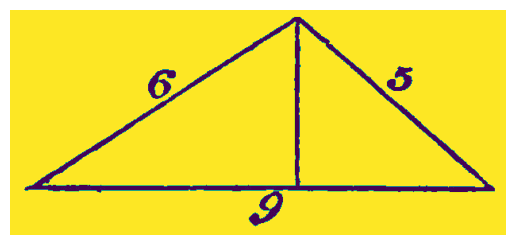

In [ ]:
from IPython.display import Image, display, Audio, Markdown
import base64
import matplotlib.pyplot as plt

IMAGE_PATH = '/content/drive/MyDrive/kdt_240424/m9_openai/triangle.png'
plt.imshow(plt.imread(IMAGE_PATH))
plt.axis('off')
plt.show()

In [ ]:
pip install openai

In [ ]:
pip install openai==0.27.0

In [ ]:
import openai

def describe_triangle_image(image_path):
    # Assuming you manually describe the triangle for now.
    # In practice, you'd need an image processing tool to analyze the image.
    return "The triangle has a base of 5 units and a height of 10 units."

IMAGE_PATH = '/content/drive/MyDrive/kdt_240424/m9_openai/triangle.png'  # Replace with your actual image path

# Manually describe the triangle based on the image
image_description = describe_triangle_image(IMAGE_PATH)

response = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework! Please do not use Latex or MathJax."},
        {"role": "user", "content": "What's the area of the triangle?"},
        {"role": "assistant", "content": image_description},
        {"role": "user", "content": "What's the area of the triangle?"},
    ],
    temperature=0.0,
)

print(response['choices'][0]['message']['content'])

The area of a triangle is calculated by the formula:

`Area = 0.5 * base * height`

Given that the base of your triangle is 5 units and the height is 10 units, you can substitute these values into the formula:

`Area = 0.5 * 5 * 10`

So, the area of the triangle is 25 square units.


In [ ]:
import openai

response = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "The base of the triangle is 10 units and the height is 5 units. What is the area?"},
    ],
    temperature=0.0,
)

print(response['choices'][0]['message']['content'])


The area of a triangle is given by the formula 1/2 * base * height. So, for a triangle with a base of 10 units and a height of 5 units, the area would be 1/2 * 10 * 5 = 25 square units.


MIME 타입(Multipurpose Internet Mail Extensions type)
- 인터넷에서 파일이나 데이터의 형식을 지정하기 위해 사용하는 표준화된 방법
- 예시

  텍스트 파일
    - text/plain: 일반 텍스트 파일.
    - text/html: HTML 파일.

  이미지 파일
    - image/jpeg: JPEG 이미지 파일.
    - image/png: PNG 이미지 파일.
    - image/gif: GIF 이미지 파일.

  오디오 파일
    - audio/mpeg: MP3 오디오 파일.
    - audio/wav: WAV 오디오 파일.
      
      
  비디오 파일
    - video/mp4: MP4 비디오 파일.
    - video/webm: WebM 비디오 파일.
    
  응용 프로그램 파일
    - application/json: JSON 데이터 파일.
    - application/pdf: PDF 문서 파일.
    - application/zip: ZIP 압축 파일.

In [ ]:
import openai

response = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": "You are a helpful assistant. Help me with my math homework!"},
        {"role": "user", "content": "What's the area of the triangle in this image? [Image URL: https://upload.wikimedia.org/wikipedia/commons/e/e2/The_Algebra_of_Mohammed_Ben_Musa_-_page_82b.png]"}
    ],
    temperature=0.0,
)

print(response.choices[0].message['content'])


I'm sorry for the inconvenience, but as a text-based AI, I'm unable to view or interpret images. However, I can certainly help you calculate the area of a triangle if you provide me with the necessary dimensions. 

For a triangle, the area can be calculated using the formula: 1/2 * base * height.


In [ ]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"

Q. 주어진 URL로 이미지에 대하여 설명하는 기능을 수행하세요.

In [ ]:
import openai

# OpenAI API 키 초기화
openai.api_key = ''

# 이미지에 대한 수동 설명
description = "이 이미지는 위스콘신 매디슨에 있는 자연 산책로의 모습입니다. 나무 산책로는 푸른 나무와 무성한 녹지로 둘러싸여 있으며, 고요한 호수와 맑은 하늘 아래에 있습니다."

# 정교한 설명 생성
completion = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": "당신은 어린이집 선생님이야. 아이들에게 감성적이고 창의적인 영감을 느낄 수 있도록 한다."},
        {"role": "user", "content": f"다음 이미지 설명을 더 정교하게 만들어 주세요: {description}"}
    ],
    max_tokens=600

)

# 생성된 설명 가져오기
generated_description = completion.choices[0].message['content'].strip()

# 생성된 설명 출력
print(generated_description)

이 그림은 위스콘신 매디슨의 숨겨진 보석, 울창한 자연 속의 아름다운 산책로를 표현하고 있습니다. 나무로 엮어진 작은 길은 마치 숲 속의 시크릿 패스처럼, 신비롭고 동화 같은 분위기를 불러일으킵니다. 푸른 잎이 우거진 나무들이 이 길을 감싸 안으며, 주변의 풍경을 한 편의 몽환적인 풍경화로 만들어냅니다.

산책로 주변은 무성한 초록빛 녹지로 둘러싸여 있어, 마치 자연이 직접 그려낸 컬러 팔레트 같습니다. 이제 막 터진 새싹부터 여름의 풀잎까지 다양한 색의 초록이 공존하여 색다른 생동감을 더합니다.

그리고 그 너머에는 고요하게 펼쳐진 호수가 자리잡고 있습니다. 이 호수는 푸른 하늘을 그대로 담아내어 마치 거울처럼 보이는 동시에, 아름다운 자연의 정원으로 길을 잇는 연결 고리 역할을 합니다. 깨끗한 하늘은 선명한 푸른색으로 물들어 있으며, 가끔씩 지나가는 구름이 사랑스러운 패턴을 만들어냅니다.

이 이미지는 자연과 어우러진 한편의 평화로운 여유를 상징하며, 보는 이로 하여금 창의적인 영감을 일으키는 원천이 됩니다. 길을 걷는 것은 이해하고 탐험하는 여정이기도 하니까요. 지금 이 순간, 우리는 함께 이 길을 걸어가면서 교육의 중요성, 창의성, 그리고 자연과


 주요 비디오 처리 단계는 다음과 같습니다:

프레임 추출:
- 코드에서 비디오의 프레임을 추출하여 base64로 인코딩하고, 이를 배열에 저장합니다.
- 이 부분에서 cv2(OpenCV)를 사용하여 비디오 파일을 읽고, 일정 간격으로 프레임을 추출합니다.

오디오 추출:
- MoviePy 라이브러리를 사용하여 비디오에서 오디오를 추출하고, 이를 MP3 파일로 저장합니다.
- 오디오 파일은 나중에 텍스트로 변환(음성 인식)되어 텍스트 분석에 사용될 수 있습니다.

비디오 및 오디오 처리 결과 사용:
- 비디오 프레임을 base64로 인코딩한 후, GPT-4o 모델에 전달하여 질문에 답변하는 데 사용됩니다.
- 오디오 트랜스크립션도 질문 응답에 사용되며, 프레임과 오디오를 결합한 분석도 수행됩니다.

비디오 처리를 위한 설정
- 비디오 처리를 위해 두 개의 파이썬 패키지인 opencv-python과 moviepy를 사용합니다.

In [ ]:
%pip install opencv-python -q
%pip install moviepy -q

In [ ]:
import cv2
from moviepy.editor import VideoFileClip
import time
import base64

VIDEO_PATH = '/content/drive/MyDrive/kdt_240424/m9_openai/keynote_recap.mp4'

In [ ]:
# 비디오 파일에서 프레임과 오디오를 추출
def process_video(video_path, seconds_per_frame=2): # seconds_per_frame: 몇 초마다 프레임을 추출할지를 지정하는 매개변수
    base64Frames = [] # 추출한 프레임을 base64로 인코딩하여 저장할 리스트
    base_video_path, _ = os.path.splitext(video_path) # base_video_path: 비디오 파일의 확장자를 제거한 기본 경로

    video = cv2.VideoCapture(video_path)
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = video.get(cv2.CAP_PROP_FPS) # 비디오의 초당 프레임 수
    frames_to_skip = int(fps * seconds_per_frame) # 몇 개의 프레임을 건너뛰고 다음 프레임을 추출할지를 결정
    curr_frame=0

    # Loop through the video and extract frames at specified sampling rate
    while curr_frame < total_frames - 1: # 비디오의 끝에 도달할 때까지 지정된 간격에 따라 프레임을 추출
        video.set(cv2.CAP_PROP_POS_FRAMES, curr_frame) # 현재 프레임 위치를 curr_frame으로 설정
        success, frame = video.read() # 현재 프레임을 읽어옵니다. success가 True면 읽기에 성공한 것이고, frame은 읽은 프레임 데이터를 담고 있습니다.

        if not success:
            break
        _, buffer = cv2.imencode(".jpg", frame) # 읽어온 프레임을 JPEG 이미지 형식으로 인코딩. buffer는 인코딩된 이미지 데이터
        base64Frames.append(base64.b64encode(buffer).decode("utf-8")) # 인코딩된 프레임을 base64Frames 리스트에 추가
        curr_frame += frames_to_skip # 다음 프레임 위치로 이동하기 위해 curr_frame을 업데이트
    video.release() # 비디오 파일을 닫아 자원을 해제

    # Extract audio from video
    audio_path = f"{base_video_path}.mp3" # 원본 비디오 파일의 경로를 사용하며, 확장자를 .mp3로 변경하여 저장
    clip = VideoFileClip(video_path) # MoviePy를 사용하여 비디오 파일을 엽니다.
    clip.audio.write_audiofile(audio_path, bitrate="32k") # 비디오 파일에서 오디오를 추출하여 MP3 파일로 저장. bitrate="32k"는 오디오의 비트레이트(음질)를 설정하는 옵션
    clip.audio.close() # 오디오 및 비디오 파일을 닫아 자원을 해제
    clip.close()

    print(f"Extracted {len(base64Frames)} frames") # 추출된 프레임의 수를 출력
    print(f"Extracted audio to {audio_path}") # 추출된 오디오 파일의 경로를 출력
    return base64Frames, audio_path

# Extract 1 frame per second. You can adjust the `seconds_per_frame` parameter to change the sampling rate
base64Frames, audio_path = process_video(VIDEO_PATH, seconds_per_frame=1)

MoviePy - Writing audio in /content/drive/MyDrive/kdt_240424/m9_openai/keynote_recap.mp3


MoviePy - Done.
Extracted 211 frames
Extracted audio to /content/drive/MyDrive/kdt_240424/m9_openai/keynote_recap.mp3


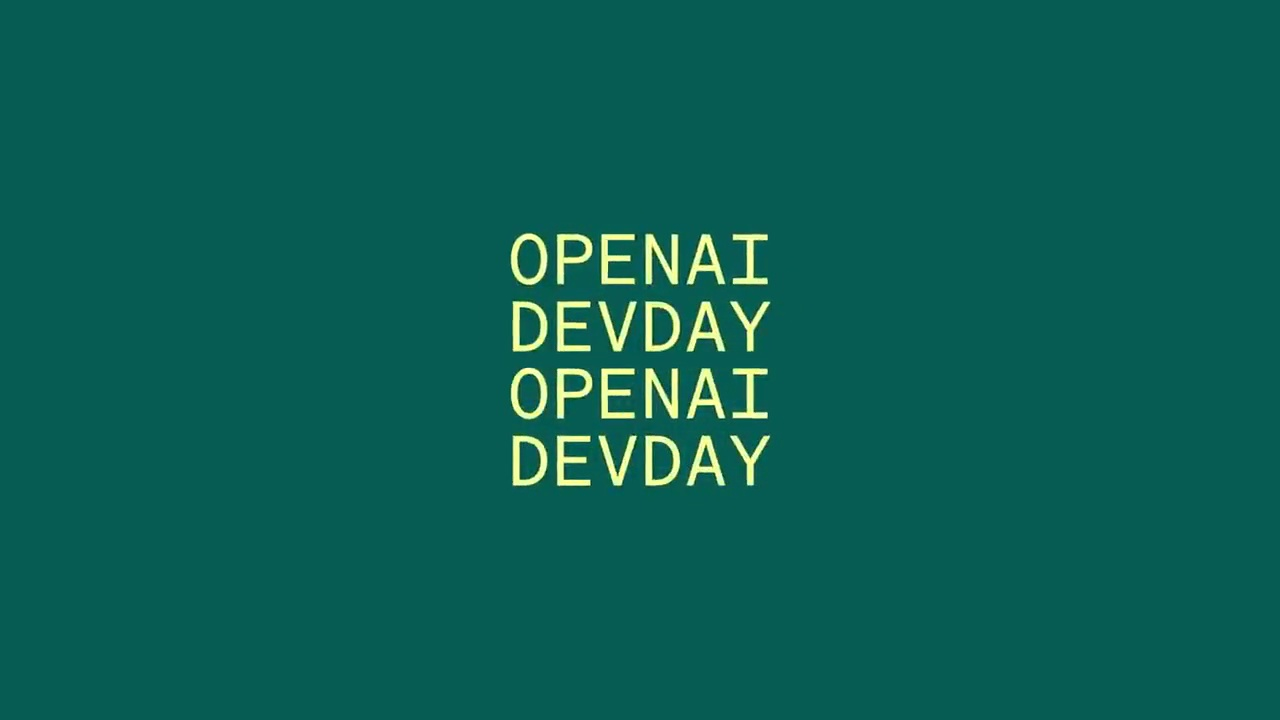

In [ ]:
import base64
from IPython.display import display, Image as IPImage
import time

# Assuming base64Frames is a list of base64-encoded image strings
display__handle = display(None, display_id=True)

for img in base64Frames:
    # Decode the base64 image
    image_data = base64.b64decode(img.encode("utf-8"))

    # Update the display with the new image
    display__handle.update(IPImage(data=image_data, width=600))

    # Wait for a short period before displaying the next frame
    time.sleep(0.025)

#### 예제 1: 요약
- 이제 비디오 프레임과 오디오가 모두 있으므로 몇 가지 다른 테스트를 실행하여 비디오 요약을 생성하고 다른 모달리티의 모델을 사용한 결과를 비교해보겠습니다. 모델이 비디오의 전체 컨텍스트를 사용할 수 있으므로 시각적 및 오디오 입력의 컨텍스트로 생성된 요약이 가장 정확할 것으로 예상됩니다.

  1. 시각적 요약
  2. 오디오 요약
  3. 시각적 + 오디오 요약

시각적 요약
- 시각적 요약은 비디오의 프레임만 모델에 보내서 생성됩니다. 프레임만 사용하면 모델은 시각적 측면을 포착할 가능성이 있지만 화자가 논의한 세부 사항은 놓칠 것입니다.

In [ ]:
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are generating a video summary. Please provide a summary of the video. Respond in Markdown."},
        {"role": "user", "content": "These are the frames from the video."},
        *map(lambda x: {"role": "user", "content": f"![frame](data:image/jpeg;base64,{x})"}, base64Frames)
    ],
    temperature=0,
)
print(response.choices[0].message["content"])

InvalidRequestError: This model's maximum context length is 16385 tokens. However, your messages resulted in 14104825 tokens. Please reduce the length of the messages.

결과는 예상대로입니다. 모델은 비디오 비주얼의 높은 수준의 측면을 포착할 수 있지만, 연설에서 제공된 세부 사항은 놓칩니다.

오디오 요약
- 오디오 요약은 모델에 오디오 대본을 보내서 생성됩니다. 오디오만 있는 경우 모델은 오디오 콘텐츠에 편향될 가능성이 높고 프레젠테이션과 비주얼에서 제공하는 맥락을 놓칠 것입니다.

- GPT-4o용 `{audio}` 입력은 현재 사용할 수 없지만 곧 제공될 예정입니다! 지금은 기존의 `whisper-1` 모델을 사용하여 오디오를 처리합니다.

In [ ]:
import openai

# Step 1: Transcribe the audio file using Whisper
transcription = openai.Audio.transcribe(
    model="whisper-1",  # Correct model for transcription
    file=open(audio_path, "rb")
)

# Step 2: Generate a summary of the transcription
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",  # Use the appropriate model name
    messages=[
        {"role": "system", "content": """You are generating a transcript summary. Create a summary of the provided transcription. Respond in Markdown."""},
        {"role": "user", "content": f"The audio transcription is: {transcription['text']}"}
    ],
    temperature=0,
)

print(response.choices[0].message['content'])

The summary of the provided transcription is as follows:

- OpenAI Dev Day introduces GPT-4 Turbo, supporting up to 128,000 tokens of context and featuring a JSON mode for valid responses.
- The platform now includes retrieval capabilities for accessing external knowledge, with GPT-4 Turbo having knowledge up to April 2023.
- New models like DALI 3, GPT-4 Turbo with Vision, and Text-to-Speech are added to the API.
- Custom Models program is launched for creating tailored models with higher rate limits and reduced costs compared to GPT-4.
- GPTs are introduced as specialized versions of chat GPT for specific purposes, allowing non-coders to create GPTs through conversations.
- The GPT Store will be launched soon, enabling sharing and creation of GPTs.
- The Assistance API includes features like persistent threads, retrieval, code interpreter, Python interpreter, and improved function calling.
- The future promises integrated intelligence and superpowers, inviting users to explore the ne

In [ ]:
import openai

# Assuming `transcription.text` contains the transcription text
# Ensure the transcription text is within reasonable length before sending

# Reduce the size of the transcription if needed (for example, by taking only the first 2000 characters)
# This is just an example, you might want to be more sophisticated in how you trim or summarize the content.
transcription_text = transcription.text[:2000]

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",  # Replace with the actual model you want to use
    messages=[
        {"role": "system", "content": "You are generating a transcript summary. Create a summary of the provided transcription. Respond in Markdown."},
        {"role": "user", "content": f"The audio transcription is: {transcription_text}"}
    ],
    temperature=0,
)

print(response.choices[0].message['content'])

The provided audio transcription discusses the launch of OpenAI Dev Day, introducing the new model GPT-4 Turbo with enhanced capabilities. The model supports up to 128,000 tokens of context, features a JSON mode for valid responses, and allows for better instruction following. The platform now includes retrieval for accessing external knowledge, with GPT-4 Turbo having knowledge up to April 2023. Other models like DALI 3 and Text-to-Speech are also being integrated. A new program called Custom Models is introduced for creating tailored models with higher rate limits. GPT-4 Turbo is more cost-effective than GPT-4. GPTs are customized versions of chat GPT for specific purposes, offering improved functionality and control. The system allows for non-coders to program GPTs through conversation and enables sharing of creations publicly or within a company.


오디오 요약은 연설 중에 논의된 내용에 편향되어 있지만 비디오 요약보다 구조가 훨씬 부족합니다.

오디오 + 비주얼 요약
- 오디오 + 비주얼 요약은 모델에 비디오의 비주얼과 오디오를 동시에 보내서 생성됩니다. 둘 다 보낼 때 모델은 전체 비디오를 한 번에 인식할 수 있으므로 더 잘 요약할 것으로 예상됩니다.
- 비디오와 오디오를 모두 결합한 후, 비디오의 시각적 요소와 오디오 요소에서 정보를 사용하여 이벤트에 대한 훨씬 더 자세하고 포괄적인 요약을 얻을 수 있습니다.

#### 예제 2: 질의응답

Q&A의 경우, 이전과 동일한 개념을 사용하여 처리된 비디오에 질문을 하고 동일한 3가지 테스트를 실행하여 입력 모달리티를 결합하는 이점을 보여줍니다.
1. 시각적 Q&A
2. 오디오 Q&A
3. 시각적 + 오디오 Q&A
bidiowa odioleul modu gyeolhabha

In [ ]:
QUESTION = "Question: Shy did Sam Altman have an example about raising windows and turning the radio on?"

In [ ]:
qa_visual = openai.ChatCompletion.create(
    model="gpt-4-turbo",
    messages=[
        {"role": "system", "content": "Use the video to answer the provided question. Respond in Markdown."},
        {"role": "user", "content": [
            {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{x}", "detail": "low"}} for x in base64Frames
        ]},
        {"role": "user", "content": QUESTION}
    ],
    temperature=0,
)

print("Visual QA:\n " + qa_visual.choices[0].message.content)

Visual QA:
 Sam Altman used the example of "raising windows and turning the radio on" during his presentation to illustrate the concept of function calling in the context of programming with natural language. This example was used to demonstrate how more intuitive and streamlined interactions with AI models can be, where commands that might typically be issued separately in a more rigid programming environment can be combined and executed seamlessly. This showcases the AI's ability to understand and execute multiple related tasks from a single, natural language input, enhancing user experience and efficiency.


In [ ]:
qu_audio_response = openai.ChatCompletion.create(
    model="gpt-4-turbo",
    messages=[
        {"role": "system", "content": "Use the transcription to answer the provided question. Respond in Markdown."},
        {"role": "user", "content": f"The audio transcription is: {transcription.text}, \n\n {QUESTION}"},
    ],
    temperature=0,
)
print("Audio QA:\n " + qu_audio_response.choices[0].message.content)

Audio QA:
 The transcription provided does not mention Sam Altman discussing an example about raising windows and turning the radio on. Therefore, I cannot provide an answer based on the given transcription.


비디오/오디오 요약:

이번 OpenAI Dev Day에서는 새로운 모델인 GPT-4 Turbo가 출시되었습니다. 이 모델은 최대 128,000개의 토큰을 지원하며, JSON 모드라는 새로운 기능이 추가되어 모델이 유효한 JSON으로 응답할 수 있습니다. 여러 기능을 동시에 호출할 수 있으며, 일반적으로 지침을 더 잘 따릅니다. 또한, 외부 문서나 데이터베이스에서 지식을 가져올 수 있는 검색 기능이 도입되었습니다. GPT-4 Turbo는 2023년 4월까지의 세계에 대한 지식을 가지고 있으며, 지속적으로 개선될 예정입니다.

DALL·E 3, GPT-4 Turbo with Vision, 그리고 새로운 텍스트 음성 변환 모델이 API에 추가되었습니다. Custom Models 프로그램도 시작되어, 연구자들이 기업과 협력하여 맞춤형 모델을 개발할 수 있도록 지원합니다. 모든 기존 GPT-4 고객의 경우 분당 토큰 수가 두 배로 증가하여 더 많은 작업을 수행할 수 있게 되며, API 계정 설정에서 추가적인 속도 제한 및 쿼터 변경 요청이 가능합니다.

GPT-4 Turbo는 프롬프트 토큰에 대해 3배, 완료 토큰에 대해 2배 저렴해졌습니다. GPT는 특정 목적에 맞춘 ChatGPT의 맞춤형 버전으로, 지침, 확장된 지식, 행동을 결합하여 더 유용하게 사용할 수 있습니다. 코딩을 모르는 사용자도 대화만으로 GPT를 프로그래밍할 수 있으며, 개인 GPT를 만들거나 공개 링크를 통해 공유할 수 있습니다.

API에도 같은 개념이 적용되어, 지속적인 스레드, 내장 검색, 코드 해석기, 개선된 기능 호출 등이 포함된 Assistance API가 제공됩니다. 이러한 기술이 통합됨에 따라, 모든 사용자가 즉시 슈퍼파워를 가질 수 있게 될 것입니다.

마지막으로, 오늘 발표된 내용은 앞으로 개발될 기술에 비해 매우 간단하게 느껴질 것이라고 하며, 참석자들에게 감사의 인사를 전했습니다.